In [ ]:
# !pip install sklearn
# !pip install featuretools
# !pip install lightgbm

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score, train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix # 混合行列
from sklearn.decomposition import PCA #主成分分析
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # ナイーブ・ベイズ
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [7]:
train_df = pd.read_csv("train.csv")
test_X = pd.read_csv("test.csv")

In [8]:
train_df.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [9]:
train_df.disease.value_counts()

0    472
1    378
Name: disease, dtype: int64

# train_yに目的変数を代入

In [10]:
train_y = train_df['disease']

In [11]:
test_X.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


In [12]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       350 non-null    int64  
 1   Gender    350 non-null    object 
 2   T_Bil     350 non-null    float64
 3   D_Bil     350 non-null    float64
 4   ALP       350 non-null    float64
 5   ALT_GPT   350 non-null    float64
 6   AST_GOT   350 non-null    float64
 7   TP        350 non-null    float64
 8   Alb       350 non-null    float64
 9   AG_ratio  350 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 27.5+ KB


In [13]:
print(test_X.Age.min(), test_X.Age.max())

6 75


In [14]:
print(train_df.Age.min(), train_df.Age.max())

10 78


In [15]:
test_X.Age = pd.cut(test_X.Age, [0, 10, 20, 30,40,50,60,70,80])

In [16]:
test_X

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,"(20, 30]",Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,"(20, 30]",Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,"(60, 70]",Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,"(60, 70]",Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,"(30, 40]",Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078
...,...,...,...,...,...,...,...,...,...,...
345,"(60, 70]",Female,0.913867,0.120555,214.354728,16.964820,28.723677,6.960649,3.505619,1.224655
346,"(50, 60]",Male,0.818573,0.206075,215.898729,14.733461,20.470517,7.531071,3.637508,1.282833
347,"(20, 30]",Male,0.787054,0.186129,214.167523,14.936585,20.589993,7.505128,3.619033,1.287256
348,"(60, 70]",Male,0.725194,0.191307,220.272862,17.532595,48.115014,7.559414,3.635871,1.263348


In [17]:
train_df.Age = pd.cut(train_df.Age, [0, 10, 20, 30,40,50,60,70,80])
train_df

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,"(50, 60]",Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,"(60, 70]",Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,"(60, 70]",Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,"(60, 70]",Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,"(20, 30]",Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0
...,...,...,...,...,...,...,...,...,...,...,...
845,"(20, 30]",Male,0.767450,0.186467,215.656126,13.963269,20.160997,6.824975,3.622443,1.297731,0
846,"(50, 60]",Male,0.867946,0.156997,213.810275,14.564305,20.122535,7.509893,3.619143,1.296843,0
847,"(40, 50]",Male,0.826785,0.138898,230.340081,40.495102,49.620857,7.529840,3.724408,0.987033,1
848,"(30, 40]",Female,0.761972,0.137969,214.170393,18.048321,54.447774,5.944855,3.150978,1.220787,0


In [18]:
# data_Xに説明変数を代入
train_X = train_df.drop('disease', axis=1)

In [19]:
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

In [20]:
train_X.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]",Gender_Female,Gender_Male
0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0,0,0,0,0,1,0,0,0,1
1,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,0,0,0,0,0,0,1,0,0,1
2,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0,0,0,0,0,0,1,0,0,1
3,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,0,0,0,0,0,0,1,0,0,1
4,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0,0,1,0,0,0,0,0,1,0


In [21]:
test_X.head()

,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]",Gender_Female,Gender_Male
0,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006,0,0,1,0,0,0,0,0,0,1
1,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562,0,0,1,0,0,0,0,0,1,0
2,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579,0,0,0,0,0,0,1,0,0,1
3,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070,0,0,0,0,0,0,1,0,0,1
4,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078,0,0,0,1,0,0,0,0,1,0


In [22]:
# 訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state=0)

# ロジスティック回帰

In [ ]:
p# lr = LinearRegression()
lr = LogisticRegression(max_iter=2000) # ロジスティック回帰モデルのインスタンスを作成
# X = boston_df.values         # 説明変数（Numpyの配列）
# Y = boston_df['MEDV'].values         # 目的変数（Numpyの配列）

In [ ]:
# テストセットでモデルを評価
loo = LeaveOneOut()
# score = cross_val_score(lr, train_X, train_y, cv=loo)
score = cross_val_score(lr, train_X, train_y, cv=5)
score.mean()

0.8329411764705881

In [ ]:
lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 評価用データの予測
pred_y_lr = lr.predict(test_X)
# 予測結果の表示
print(pred_y_lr)

[0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0]


In [ ]:
names = ["Logistic Regression", "Nearest Neighbors", 
         "Linear SVM", "Polynomial SVM", "RBF SVM", "Sigmoid SVM", 
         "Decision Tree","Random Forest", "AdaBoost", "Naive Bayes"]

classifiers = [
    LogisticRegression(max_iter=3000),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    SVC(kernel="sigmoid"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()]

In [ ]:
result = []
for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
    clf.fit(train_X, train_y) # 学習
    score1 = clf.score(train_X, train_y) # 正解率（train）の算出
    score2 = clf.score(train_X, train_y) # 正解率（test）の算出
    result.append([score1, score2]) # 結果の格納

# test の正解率の大きい順に並べる
df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort_values('test', ascending=False)

In [ ]:
df_result

,train,test
Decision Tree,1.000000,1.000000
Random Forest,1.000000,1.000000
AdaBoost,0.908235,0.908235
Nearest Neighbors,0.867059,0.867059
Linear SVM,0.850588,0.850588
Logistic Regression,0.849412,0.849412
Naive Bayes,0.801176,0.801176
RBF SVM,0.772941,0.772941
Sigmoid SVM,0.725882,0.725882
Polynomial SVM,0.687059,0.687059


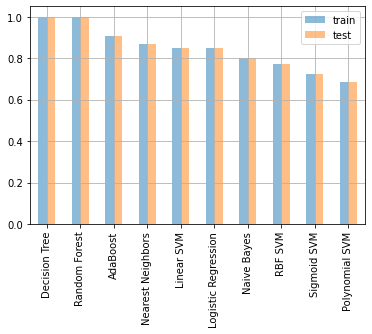

In [ ]:
# 棒グラフの描画
df_result.plot(kind='bar', alpha=0.5, grid=True)

In [ ]:
result = []
for trial in range(20): # 20 回繰り返す
    X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=.4) # 訓練データ・テストデータの生成
    for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
        clf.fit(X_train, y_train) # 学習
        score1 = clf.score(X_train, y_train) # 正解率（train）の算出
        score2 = clf.score(X_test, y_test) # 正解率（test）の算出
        result.append([name, score1, score2]) # 結果の格納

df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test'])

In [ ]:
df_result

,classifier,train,test
0,Logistic Regression,0.825490,0.820588
1,Nearest Neighbors,0.870588,0.802941
2,Linear SVM,0.843137,0.826471
3,Polynomial SVM,0.656863,0.620588
4,RBF SVM,0.715686,0.702941
...,...,...,...
195,Sigmoid SVM,0.649020,0.652941
196,Decision Tree,1.000000,0.814706
197,Random Forest,1.000000,0.888235
198,AdaBoost,0.900000,0.832353


In [ ]:
# 分類器 (classifier) 毎にグループ化して正解率の平均を計算し、test の正解率の平均の大きい順に並べる
df_result_mean = df_result.groupby('classifier').mean().sort_values('test', ascending=False)

In [ ]:
df_result_mean

,train,test
classifier,,
Random Forest,1.000000,0.860735
Linear SVM,0.851569,0.838824
AdaBoost,0.934314,0.837941
Logistic Regression,0.846863,0.829412
Nearest Neighbors,0.858235,0.809265
Decision Tree,1.000000,0.803676
Naive Bayes,0.796078,0.790000
RBF SVM,0.733725,0.719853
Polynomial SVM,0.675392,0.660441


In [ ]:
# エラーバーの表示に用いる目的で、標準偏差を計算する
errors = df_result.groupby('classifier').std()

In [ ]:
errors # 結果の確認

,train,test
classifier,,
AdaBoost,0.013532,0.017147
Decision Tree,0.000000,0.021292
Linear SVM,0.011203,0.011554
Logistic Regression,0.013267,0.015622
Naive Bayes,0.013629,0.015922
Nearest Neighbors,0.010590,0.009837
Polynomial SVM,0.018683,0.026812
RBF SVM,0.020757,0.027802
Random Forest,0.000000,0.014975


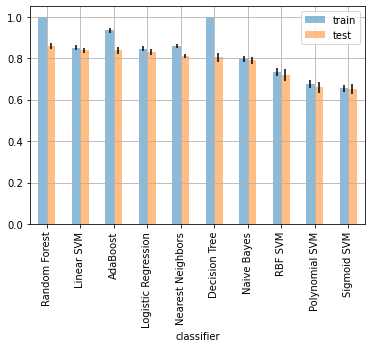

In [ ]:
# 平均値と標準偏差を用いて棒グラフを描画
df_result_mean.plot(kind='bar', alpha=0.5, grid=True, yerr=errors)

In [ ]:
DTC = DecisionTreeClassifier()
score = cross_val_score(DTC, train_X, train_y, cv=5)
score.mean()

0.8105882352941176

In [ ]:
RFC = RandomForestClassifier()
score = cross_val_score(RFC, train_X, train_y, cv=5)
score.mean()

0.8647058823529411

In [ ]:
RFC.fit(train_X, train_y)
# 評価用データの予測
pred_y = RFC.predict(test_X)

# 予測結果の表示
print(pred_y)

[0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0
 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1]


# LightGBM

In [23]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM のハイパーパラメータ
lgbm_params = {
    # 二値分類問題
    'objective': 'binary',
    # AUC の最大化を目指す
    'metric': 'auc',
    # Fatal の場合出力
    'verbosity': -1,
}

# 上記のパラメータでモデルを学習する
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval,
                  verbose_eval=50,  # 50イテレーション毎に学習結果出力
                  num_boost_round=1000,  # 最大イテレーション回数指定
                  early_stopping_rounds=100
                 )

# 保存
model.save_model('model.txt')

# テストデータを予測する
y_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's auc: 0.959099
[100]	valid_0's auc: 0.955882
[150]	valid_0's auc: 0.955423
Early stopping, best iteration is:
[58]	valid_0's auc: 0.961305


In [ ]:
# y_pred = np.round(y_pred)

In [ ]:
# しきい値 0.5 で最尤なクラスに分類する
# y_pred = np.where(y_pred_proba > 0.5, 1, 0)

In [24]:
y_pred_proba

array([0.51836532, 0.99615571, 0.99126617, 0.99881357, 0.90477114,
       0.03509317, 0.36732213, 0.80025247, 0.1555769 , 0.00194388,
       0.88578197, 0.0186409 , 0.00217748, 0.02380453, 0.00978743,
       0.0117035 , 0.99028239, 0.00702161, 0.99432044, 0.80065922,
       0.2814054 , 0.99741855, 0.81429598, 0.99766612, 0.20931621,
       0.99822827, 0.00883142, 0.06185438, 0.02873935, 0.0038652 ,
       0.30419426, 0.13029887, 0.00810858, 0.0070067 , 0.07384379,
       0.01639933, 0.61885332, 0.97955192, 0.00961194, 0.00272413,
       0.15062032, 0.99862371, 0.9976561 , 0.99749029, 0.00692722,
       0.99750589, 0.89053894, 0.99419814, 0.98997276, 0.25252639,
       0.0032044 , 0.94285181, 0.02834042, 0.99825664, 0.00284977,
       0.01228083, 0.40207471, 0.61126943, 0.01660494, 0.99492471,
       0.00653124, 0.00225063, 0.01000083, 0.09345487, 0.13162864,
       0.99328836, 0.00271304, 0.11463037, 0.99157172, 0.91792657,
       0.36902248, 0.01691905, 0.99460238, 0.87066293, 0.96605

In [25]:
y_pred = y_pred_proba

In [26]:
print('Accuracy score = \t {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score = \t {}'.format(precision_score(y_test, y_pred)))
print('Recall score =   \t {}'.format(recall_score(y_test, y_pred)))
print('F1 score =      \t {}'.format(f1_score(y_test, y_pred)))

ValueError: ignored

In [27]:
# 保存したモデルを使う場合
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)

# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.9613051470588235


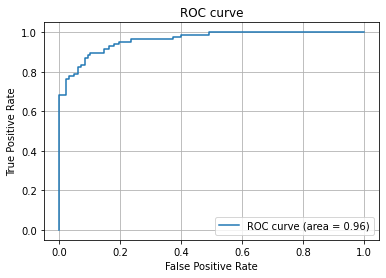

In [28]:
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# 提出用データ作成

In [29]:
# RFC.fit(train_X, train_y)
# 評価用データの予測
y_pred_proba = model.predict(test_X)
# pred_y = np.where(y_pred_proba > 0.5, 1, 0)
pred_y = y_pred_proba
# 予測結果の表示
print(pred_y)

[0.00316026 0.58604926 0.00323041 0.11277529 0.01793184 0.01516046
 0.99732585 0.5838252  0.90898855 0.42044595 0.02753866 0.03762698
 0.25014451 0.99766391 0.0014547  0.4015893  0.97394024 0.01707348
 0.01949604 0.003657   0.37046068 0.00231361 0.18281498 0.42348619
 0.10318781 0.00986803 0.0648181  0.9945428  0.83755076 0.99744633
 0.16923352 0.99659327 0.09032611 0.22761152 0.86050877 0.99884625
 0.00581583 0.34891698 0.00939694 0.99417902 0.81196382 0.58639844
 0.98653708 0.68681561 0.17690522 0.23786319 0.00143603 0.88366328
 0.47651214 0.87090637 0.30301874 0.28399692 0.99215923 0.28376497
 0.23573859 0.00132124 0.79220364 0.01862218 0.99850551 0.21439211
 0.56864604 0.00687264 0.99814975 0.13797754 0.04377613 0.03400961
 0.98982046 0.93138347 0.18357478 0.00778728 0.97185432 0.26532782
 0.1135426  0.16387063 0.01135222 0.97860126 0.87747381 0.99849906
 0.01011526 0.43781658 0.97687844 0.98193043 0.00807266 0.82752309
 0.00725548 0.92512084 0.00668014 0.00279975 0.00358613 0.3666

In [30]:
submit = pd.read_csv("sample_submit.csv", header=None)

In [31]:
submit[1] = pred_y

In [32]:
submit.to_csv("submit.csv", index=False, header=False)

# フォーラム投稿用検証

In [34]:
import re
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBRegressor
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

# test input data with string, int, and symbol-included columns 
df = pd.DataFrame({'0': np.random.randint(0, 2, size=100),
                   '[test1]': np.random.uniform(0, 1, size=100),
                   'test2': np.random.uniform(0, 1, size=100),
                  3: np.random.uniform(0, 1, size=100)})

df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

target = df.iloc[:, 0]
predictors = df.iloc[:, 1:]

# basic xgb model
xgb0 = XGBRegressor(objective= 'reg:linear')
xgb0.fit(predictors, target)

[15:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [35]:
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBRegressor

# test input data with string, int, and symbol-included columns 
df = pd.DataFrame({'0': np.random.randint(0, 2, size=100),
                   'test1': np.random.uniform(0, 1, size=100),
                   'test2': np.random.uniform(0, 1, size=100),
                  3: np.random.uniform(0, 1, size=100)})

target = df.iloc[:, 0]
predictors = df.iloc[:, 1:]

# basic xgb model
xgb0 = XGBRegressor(objective= 'reg:linear')
xgb0.fit(predictors, target)

[15:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)